# Lab
 This notebook provides a flow similar to that given in the Lab.docx for those who want to do things using code. The 4 sections of is notebook are: 
 * Profiling and Visualization
 * Refining
 * Model Seleciton
 * Deployment

## Get the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
body = 'employees.csv'
    
df_data_1 = pd.read_csv(body)
df_data_1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df_data_1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df_data_1.shape

(1470, 35)

## Profiling
In this section, we will use the built in Pandas functions to understand the data and then use Matplotlib to visualize
### Statistics

In [5]:
print(df_data_1.shape)
df_data_1.describe()

(1470, 35)


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Unique Values

In [6]:
df_data_1.T.apply(lambda x: x.nunique(), axis=1)

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
column_name = input('Which column do you want to visualize: ') or 'Age'

Which column do you want to visualize:  Age


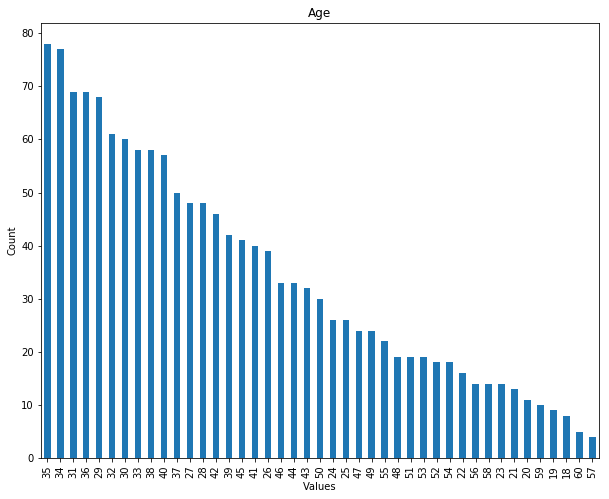

In [8]:
plt.figure(figsize=(10, 8))
plt.title(column_name)
plt.xlabel('Values')
plt.ylabel('Count')
df_data_1[column_name].value_counts().plot(kind='bar')
plt.show()

### Missing values

In [9]:
print('Columns with more than one missing value')
empty = df_data_1.isnull().sum()
empty[empty>0]

Columns with more than one missing value


Series([], dtype: int64)

### Correlation

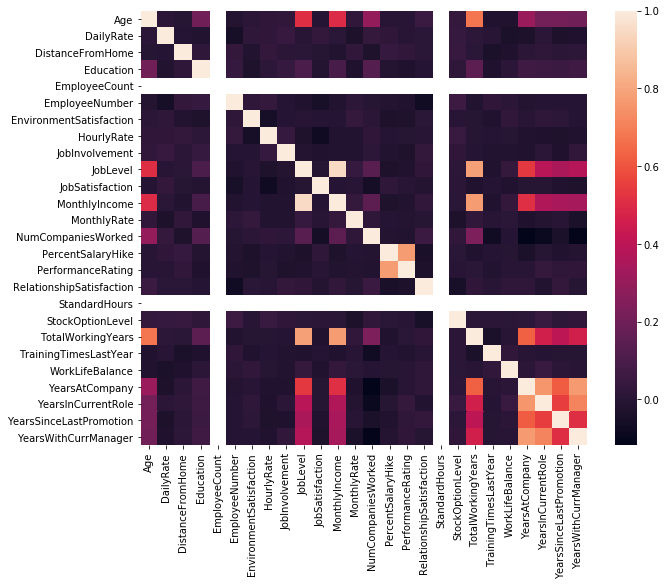

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_data_1.corr())
plt.show()

Correlation with a particular column

In [11]:
column_name = input('Which column do you want to calculate the correlation for: ') or 'Age'
df_data_1.corr()[str(column_name)]

Which column do you want to calculate the correlation for:  Age


Age                         1.000000
DailyRate                   0.010661
DistanceFromHome           -0.001686
Education                   0.208034
EmployeeCount                    NaN
EmployeeNumber             -0.010145
EnvironmentSatisfaction     0.010146
HourlyRate                  0.024287
JobInvolvement              0.029820
JobLevel                    0.509604
JobSatisfaction            -0.004892
MonthlyIncome               0.497855
MonthlyRate                 0.028051
NumCompaniesWorked          0.299635
PercentSalaryHike           0.003634
PerformanceRating           0.001904
RelationshipSatisfaction    0.053535
StandardHours                    NaN
StockOptionLevel            0.037510
TotalWorkingYears           0.680381
TrainingTimesLastYear      -0.019621
WorkLifeBalance            -0.021490
YearsAtCompany              0.311309
YearsInCurrentRole          0.212901
YearsSinceLastPromotion     0.216513
YearsWithCurrManager        0.202089
Name: Age, dtype: float64

## Refining
In this section, we will use the built in Pandas functions to clean up the data and prepare it for modelling.

### Mask employeeID

In [12]:
from random import sample, randint, seed

seed(0)
df_masked = df_data_1.copy()
df_masked['EmployeeNumber'] = df_masked['EmployeeNumber'].apply(lambda x: randint(1000, 100000)+int(x + randint(1000, 100000)))
df_masked.set_index('EmployeeNumber', inplace=True)
df_masked.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
107620,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
41244,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
132708,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
94835,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
111405,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


### Drop empty

In [13]:
df_no_empty = df_masked.dropna()
df_no_empty.shape

(1470, 34)

### Drop 0 variance

In [14]:
df_no_var = df_no_empty.loc[:,df_no_empty.apply(pd.Series.nunique) != 1]
df_no_var.shape

(1470, 31)

## Modelling

We will use the same models in WML and compare the results. However he have to manually encode the data into numbers. 

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

Use Pandas' built in get_dummies to encode all the categorical variables (strings) to numbers. We will keep numeric categorical variables as integers since they are all ordinal numbers

In [16]:
data = pd.get_dummies(df_no_var)
data.drop(columns=['Attrition_No'], inplace=True)
print(data.shape)
data.head()

(1470, 52)


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
107620,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,1,0,0,0,1,0,1
41244,49,279,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
132708,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,1,0,1
94835,33,1392,3,4,4,56,3,1,3,2909,...,0,0,1,0,0,0,1,0,0,1
111405,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,1,0,1,0


train test split and x-y split (70-30)

In [17]:
X = data.drop(columns=['Attrition_Yes'])
Y = data['Attrition_Yes']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# Train All Classifiers
The next 4 cells won't show any output

### Logistic Regression Classifier

In [18]:
lr_classifier = LogisticRegression()
y_pred_lr = lr_classifier.fit(x_train, y_train).predict(x_test)

/home/aoun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Decision Tree

In [19]:
tree_classifier = DecisionTreeClassifier()
y_pred_tree = tree_classifier.fit(x_train, y_train).predict(x_test)

### Random Forest

In [20]:
forest_classifer = RandomForestClassifier()
y_pred_forest = tree_classifier.fit(x_train, y_train).predict(x_test)

### Gradient Boosting Tree

In [21]:
gbt_classifer = GradientBoostingClassifier()
y_pred_gbt = tree_classifier.fit(x_train, y_train).predict(x_test)

# Compare the results
calculate the metrics for each output and finally show the results

In [22]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

In [23]:
a_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
lr_res = {'acc': a_lr, 'auc':auc_lr, 'f1':f1_lr}

In [24]:
a_tree = accuracy_score(y_test, y_pred_tree)
auc_tree = roc_auc_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
tree_res = {'acc': a_tree, 'auc':auc_tree, 'f1':f1_tree}

In [25]:
a_forest = accuracy_score(y_test, y_pred_forest)
auc_forest = roc_auc_score(y_test, y_pred_forest)
f1_forest = f1_score(y_test, y_pred_forest)
forest_res = {'acc': a_forest, 'auc':auc_forest, 'f1':f1_forest}

In [26]:
a_gbt = accuracy_score(y_test, y_pred_gbt)
auc_gbt = roc_auc_score(y_test, y_pred_gbt)
f1_gbt = f1_score(y_test, y_pred_gbt)
gbt_res = {'acc': a_gbt, 'auc':auc_gbt, 'f1':f1_gbt}

In [27]:
d = [lr_res, tree_res, forest_res, gbt_res]
idx = ['LR', 'Decision Tree', 'Random Forest', 'Gradient Boost Tree']
columns = ['Accuracy', 'AUC', 'F1']
results = pd.DataFrame(data=d, index=idx)
results.columns=columns

In [28]:
results

,Accuracy,AUC,F1
LR,0.882086,0.667948,0.490196
Decision Tree,0.793651,0.632318,0.380952
Random Forest,0.780045,0.607137,0.340136
Gradient Boost Tree,0.782313,0.602798,0.333333
